<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Convexity" data-toc-modified-id="Convexity-1">Convexity</a></span></li><li><span><a href="#Gradient-Descent-Finds-Local-Minima" data-toc-modified-id="Gradient-Descent-Finds-Local-Minima-2">Gradient Descent Finds Local Minima</a></span></li><li><span><a href="#Definition-of-Convexity" data-toc-modified-id="Definition-of-Convexity-3">Definition of Convexity</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-4">Summary</a></span></li></ul></div>

In [4]:
# HIDDEN
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
# import ipywidgets as widgets
# from ipywidgets import interact, interactive, fixed, interact_manual
# import nbinteract as nbi

sns.set()
sns.set_context('talk')
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

In [5]:
# HIDDEN
tips = sns.load_dataset('tips')
tips['pcttip'] = tips['tip'] / tips['total_bill'] * 100

In [13]:
# HIDDEN
def mse_cost(theta, y_vals):
    return np.mean((y_vals - theta) ** 2)

def abs_cost(theta, y_vals):
    return np.mean(np.abs(y_vals - theta))

def quartic_cost(theta, y_vals):
    return np.mean(1/5000 * (y_vals - theta + 12) * (y_vals - theta + 23)
                   * (y_vals - theta - 14) * (y_vals - theta - 15) + 7)

def grad_quartic_cost(theta, y_vals):
#     return -2 * np.mean(y_vals - theta)
    return -1/2500 * (2 *(y_vals - theta)**3 + 9*(y_vals - theta)**2
                      - 529*(y_vals - theta) - 327)

def plot_cost(y_vals, xlim, cost_fn):
    thetas = np.arange(xlim[0], xlim[1] + 0.01, 0.05)
    costs = [cost_fn(theta, y_vals) for theta in thetas]
    
    plt.figure(figsize=(5, 3))
    plt.plot(thetas, costs, zorder=1)
    plt.xlim(*xlim)
    plt.title(cost_fn.__name__)
    plt.xlabel(r'$ \theta $')
    plt.ylabel('Cost')
    
def plot_theta_on_cost(y_vals, theta, cost_fn, **kwargs):
    cost = cost_fn(theta, y_vals)
    default_args = dict(label=r'$ \theta $', zorder=2,
                        s=200, c=sns.xkcd_rgb['green'])
    plt.scatter([theta], [cost], **{**default_args, **kwargs})
    
def plot_connected_thetas(y_vals, theta_1, theta_2, cost_fn, **kwargs):
    plot_theta_on_cost(y_vals, theta_1, cost_fn)
    plot_theta_on_cost(y_vals, theta_2, cost_fn)
    cost_1 = cost_fn(theta_1, y_vals)
    cost_2 = cost_fn(theta_2, y_vals)
    plt.plot([theta_1, theta_2], [cost_1, cost_2])

In [7]:
# HIDDEN
def plot_one_gd_iter(y_vals, theta, cost_fn, grad_cost, alpha=2.5):
    new_theta = theta - alpha * grad_cost(theta, y_vals)
    plot_cost(pts, (-23, 25), cost_fn)
    plot_theta_on_cost(pts, theta, cost_fn, c='none',
                       edgecolor=sns.xkcd_rgb['green'], linewidth=2)
    plot_theta_on_cost(pts, new_theta, cost_fn)
    print(f'old theta: {theta}')
    print(f'new theta: {new_theta[0]}')

## Convexity

Gradient descent provides a general method for minimizing a function. As we observe for the Huber cost, gradient descent is especially useful when the function's minimum is difficult to find analytically. 

## Gradient Descent Finds Local Minima

Unfortunately, gradient descent does not always find the globally minimizing $ \theta $. Consider the following gradient descent run using an initial $ \theta = -21 $ on the cost function below.

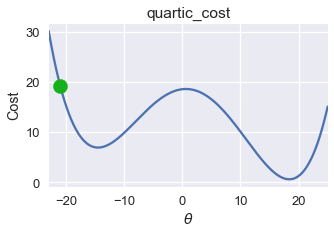

In [8]:
# HIDDEN
pts = np.array([0])
plot_cost(pts, (-23, 25), quartic_cost)
plot_theta_on_cost(pts, -21, quartic_cost)

old theta: -21
new theta: -9.944999999999999


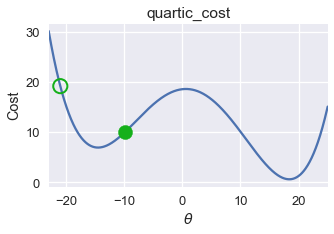

In [9]:
# HIDDEN
plot_one_gd_iter(pts, -21, quartic_cost, grad_quartic_cost)

old theta: -9.9
new theta: -12.641412


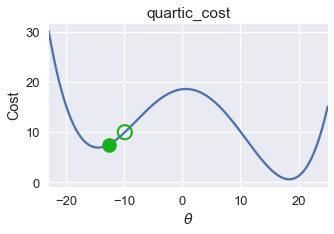

In [10]:
# HIDDEN
plot_one_gd_iter(pts, -9.9, quartic_cost, grad_quartic_cost)

old theta: -12.6
new theta: -14.162808


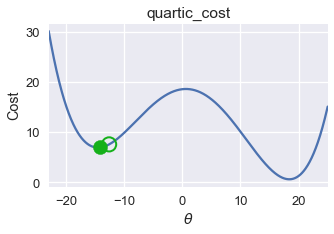

In [11]:
# HIDDEN
plot_one_gd_iter(pts, -12.6, quartic_cost, grad_quartic_cost)

old theta: -14.2
new theta: -14.497463999999999


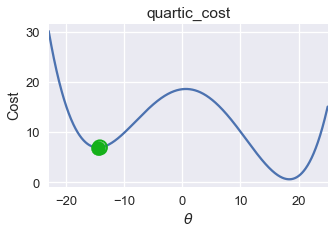

In [12]:
# HIDDEN
plot_one_gd_iter(pts, -14.2, quartic_cost, grad_quartic_cost)

On this cost function and $ \theta $ value, gradient descent converges to $ \theta = -14.5 $, producing a cost of roughly 8. However, the global minimum for this cost function is $ \theta = 18 $, corresponding to a cost of nearly zero. From this example, we observe that gradient descent finds a *local minimum* which may not necessarily have the same cost as the *global minimum*.

Luckily, a number of useful cost functions have identical local and global minima. Consider the familiar mean squared error cost function, for example:

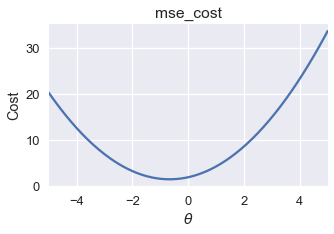

In [14]:
# HIDDEN
pts = np.array([-2, -1, 1])
plot_cost(pts, (-5, 5), mse_cost)

Running gradient descent on this cost function with an appropriate learning rate will always find the globally optimal $ \theta $ since the sole local minimum is also the global minimum.

The mean absolute error cost sometimes has multiple local minima. However, all the local minima produce the globally lowest cost possible.

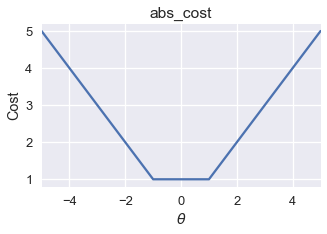

In [18]:
# HIDDEN
pts = np.array([-1, 1])
plot_cost(pts, (-5, 5), abs_cost)

On this cost function, gradient descent will converge to one of the local minima in the range $ [-1, 1] $. Since all of these local minima have the lowest cost possible for this function, gradient descent will still return an optimal choice of $ \theta $.

## Definition of Convexity

For some functions, any local minimum is also a global minimum. This set of functions are called **convex functions** since they curve upward. For a constant model, the MSE, mean absolute error, and Huber cost are all convex.

With an appropriate learning rate, gradient descent finds the globally optimal $ \theta $ for convex cost functions. Because of this useful property, we prefer to fit our models using convex cost functions unless we have a good reason not to.

Formally, a function $f$ is convex if and only if it satisfies the following inequality for all possible function inputs $a$ and $b$, for all $t \in [0, 1]$:

$$tf(a) + (1-t)f(b) \geq f(ta + (1-t)b)$$

This inequality states that all lines connecting two points of the function must reside on or above the function itself. For the cost function at the start of the section, we can easily find such a line that appears below the graph:

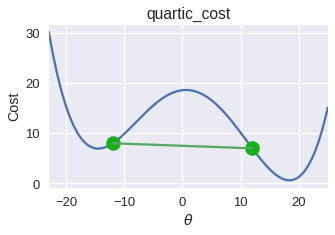

In [24]:
# HIDDEN
pts = np.array([0])
plot_cost(pts, (-23, 25), quartic_cost)
plot_connected_thetas(pts, -12, 12, quartic_cost)

Thus, this cost function is non-convex.

For the MSE cost, all lines connecting two points of the graph appear above the graph. We plot one such line below.

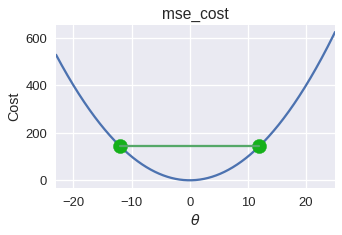

In [25]:
# HIDDEN
pts = np.array([0])
plot_cost(pts, (-23, 25), mse_cost)
plot_connected_thetas(pts, -12, 12, mse_cost)

The mathematical definition of convexity gives us a precise way of determining whether a function is convex. In this textbook, we will omit mathematical proofs of convexity and will instead state whether a chosen cost function is convex.

## Summary

For a convex function, any local minimum is also a global minimum. This useful property allows gradient descent to efficiently find the globally optimal model parameters for a given cost function. While gradient descent will converge to a local minimum for non-convex cost functions, these local minima are not guaranteed to be globally optimal.